# Data Exploration in Python
Sahil Patel - April 30th 2017


In [25]:
# Load relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [26]:
# Load the training set
df_train = pd.read_csv('input/train.csv')

In [27]:
# Check all the columns
df_train.columns



Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)

In [28]:
# Shape of data file
df_train.shape

(30471, 292)

In [29]:
# Number of columns
len(df_train.columns)


292

In [30]:
# Number of rows
len(df_train.index)

30471

In [31]:
# Data dictionary
data_dictionary = pd.read_table('input/data_dictionary.txt')

In [32]:
data_dictionary.shape

(142, 1)

In [33]:
data_dictionary

,# train.csv and test.csv
0,price_doc: sale price (this is the target vari...
1,id: transaction id
2,timestamp: date of transaction
3,"full_sq: total area in square meters, includin..."
4,"life_sq: living area in square meters, excludi..."
5,"floor: for apartments, floor of the building"
6,max_floor: number of floors in the building
7,material: wall material
8,build_year: year built
9,num_room: number of living rooms


# Target variable: price_doc

In [34]:
df_train['price_doc'].describe()


count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

The average price is 7,100,000 rubles 

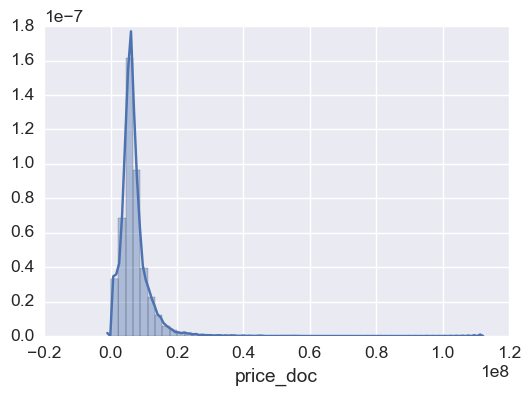

In [35]:
# Histogram of property prices
sns.distplot(df_train['price_doc'])

# Correlation Matrix

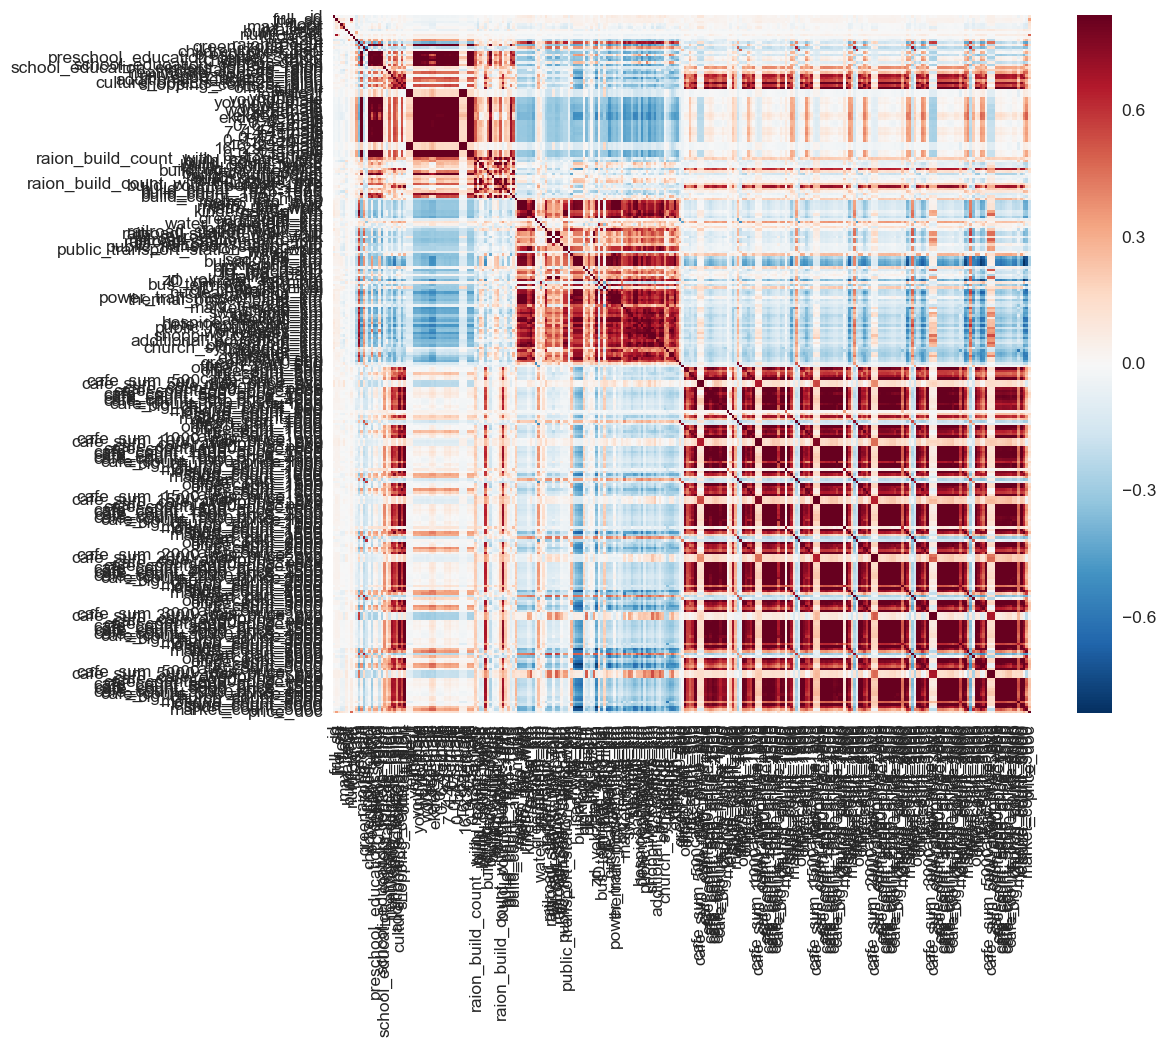

In [36]:
# Correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax =0.8, square = True)

There are 292 variables so its hard to draw from this correlation matrix

### 'price_doc' correlation matrix (zoomed heatmap style)

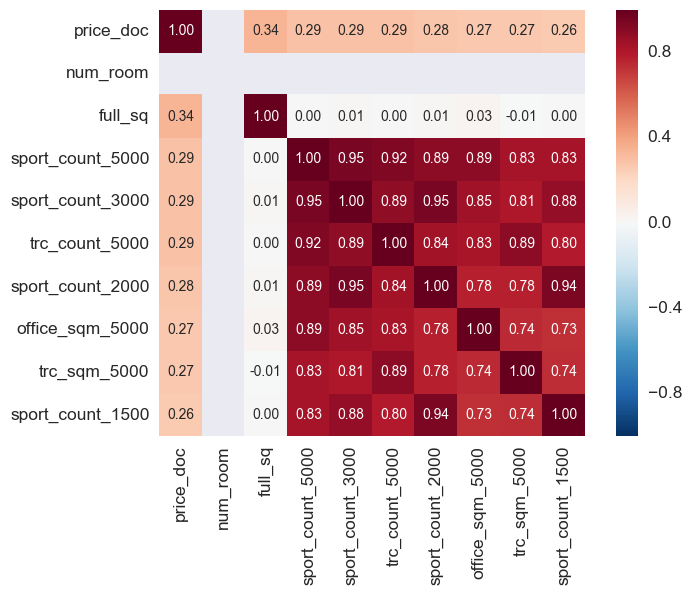

In [37]:
k = 10
cols = corrmat.nlargest(k, 'price_doc')['price_doc'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values )
plt.show()

On a whole the features are highly correlated with eachother, with a weak correlation with the price_doc variable
